# Image compression using SVD

This example is taken from Brunton and Katz and modified a little bit.

In [4]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

If the image file does not exist, then download it.

In [5]:
if os.path.isfile('../DATA/dog.jpg') == False:
    !mkdir -p ../DATA
    !wget -P ../DATA -c https://bitbucket.org/cpraveen/nla/downloads/dog.jpg

Read and plot the image.

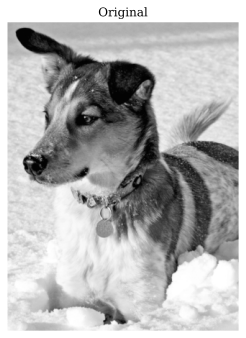

In [6]:
A = imread('../DATA/dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original')
plt.show()

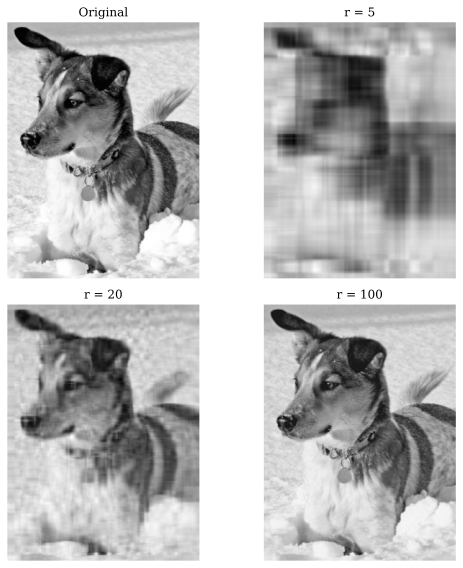

In [7]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

plt.figure(figsize=(8,8))
j = 0
plt.subplot(2,2,j+1); j += 1
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original')

for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.subplot(2,2,j+1); j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
plt.show()

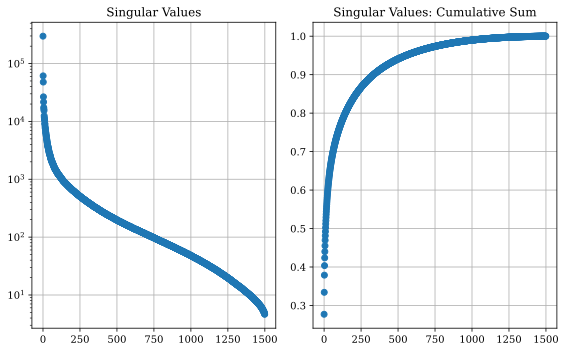

In [8]:
## f_ch01_ex02_2

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.semilogy(np.diag(S),'o')
plt.title('Singular Values')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)),'o')
plt.title('Singular Values: Cumulative Sum')
plt.grid(True)

plt.show()